In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
train = pd.read_csv('train.csv')

In [68]:
train['Sex'].replace({
    'male':1,
    'female':0
}, inplace=True)

In [69]:
train['Age'].replace({
    np.nan : np.sum(train['Age']) / train.shape[0]
}, inplace=True)

In [70]:
train['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 23.79929293,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [71]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,28.527099,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.213618,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


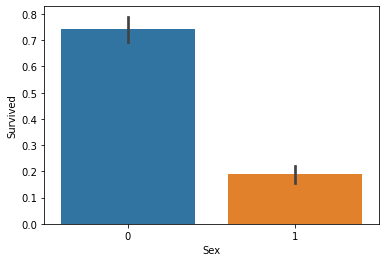

In [74]:
sns.barplot(x=train['Sex'], y=train['Survived'])
plt.show()

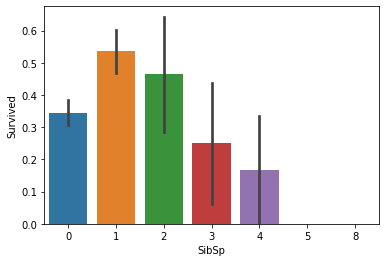

In [75]:
sns.barplot(x=train['SibSp'], y=train['Survived'])
plt.show()

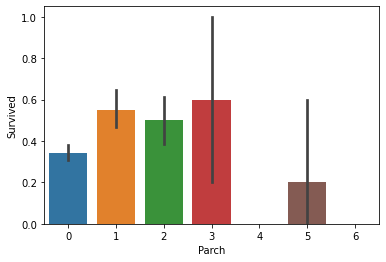

In [76]:
sns.barplot(x=train['Parch'], y=train['Survived'])
plt.show()

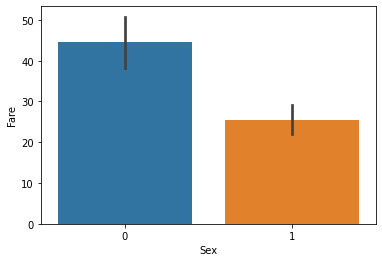

In [77]:
sns.barplot(x=train['Sex'], y=train['Fare'])
plt.show()

In [78]:
def sigmoid(z):
    g = 1.0 / (1 + np.exp(-z))
    return g

In [79]:
def compute_cost(x, y, w, b, lambda_=0.001):
    m, n = x.shape
    z = np.dot(x, w) + b
    f_wb = sigmoid(z)
    
    cost = (-(1.0 / m) * np.sum(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))) + (lambda_/(2*m))*np.sum(np.square(w))
    return cost

In [80]:
def compute_gradient(x, y, w, b, lambda_=0.001):
    m ,n = x.shape
    
    dw = np.zeros((n ,))
    db = 0.0
    
    for i in range(m):
        z_i = np.dot(x[i], w) + b
        f_wb_i = sigmoid(z_i)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dw[j] = dw[j] + err_i * x[i, j]
        db = db + err_i
    dw = dw / m
    db = db / m
    
    for i in range(n):
        dw[i] = dw[i] + (lambda_ / m) * w[j]
    return dw, db

In [126]:
def gradient_descent(x, y, max_iter):
    m ,n = x.shape
    alpha = 1e-2
    w = np.zeros((n ,))
    b = 0.0
    
    J_hist = []
    for i in range(max_iter):
        # Finding the value of the change i.e., dw and db
        dw, db = compute_gradient(x, y, w, b)
        
        # Updating the value of the parameters w and b
        w = w - (alpha * dw)
        b = b - (alpha * db)
        
        # Finding the value of the cost function
        J_hist.append(compute_cost(x, y, w, b))
        
        if i%50 == 0:
            print(f"Iteration: {i}; Cost: {J_hist[i]}")
            
    # Plotting the learning curve
    plt.plot(range(max_iter), J_hist)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost Function Value")
    plt.title("Learning Curve")
    plt.show()
    return w,b

In [127]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [128]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [129]:
X = np.array(train[['Pclass', 'Sex', 'Age','SibSp', 'Parch']])

In [130]:
X.shape

(891, 5)

In [131]:
X

array([[ 3.        ,  1.        , 22.        ,  1.        ,  0.        ],
       [ 1.        ,  0.        , 38.        ,  1.        ,  0.        ],
       [ 3.        ,  0.        , 26.        ,  0.        ,  0.        ],
       ...,
       [ 3.        ,  0.        , 23.79929293,  1.        ,  2.        ],
       [ 1.        ,  1.        , 26.        ,  0.        ,  0.        ],
       [ 3.        ,  1.        , 32.        ,  0.        ,  0.        ]])

In [132]:
Y = np.array(train['Survived'])

In [133]:
Y.shape

(891,)

In [134]:
Y[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [135]:
Y[:15]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [136]:
# Normalizing the training dataset
mu_X = np.mean(X, axis=0)
sigma_X = np.std(X, axis=0)
X = (X - mu_X) / sigma_X

In [137]:
X.shape

(891, 5)

In [138]:
X.max()

6.974147318082627

In [139]:
X

array([[ 0.82737724,  0.73769513, -0.49424498,  0.43279337, -0.47367361],
       [-1.56610693, -1.35557354,  0.71730707,  0.43279337, -0.47367361],
       [ 0.82737724, -1.35557354, -0.19135697, -0.4745452 , -0.47367361],
       ...,
       [ 0.82737724, -1.35557354, -0.35799892,  0.43279337,  2.00893337],
       [-1.56610693,  0.73769513, -0.19135697, -0.4745452 , -0.47367361],
       [ 0.82737724,  0.73769513,  0.26297505, -0.4745452 , -0.47367361]])

Iteration: 0; Cost: 0.6920194513765547
Iteration: 50; Cost: 0.642934763354552
Iteration: 100; Cost: 0.6055844248544703
Iteration: 150; Cost: 0.5768701821961557
Iteration: 200; Cost: 0.5545251803355999
Iteration: 250; Cost: 0.5369142274006667
Iteration: 300; Cost: 0.5228599398499099
Iteration: 350; Cost: 0.511510138903156
Iteration: 400; Cost: 0.5022424295467425
Iteration: 450; Cost: 0.49459724603456723
Iteration: 500; Cost: 0.48823126148084567
Iteration: 550; Cost: 0.4828849409835092
Iteration: 600; Cost: 0.4783598113785009
Iteration: 650; Cost: 0.4745023999295236
Iteration: 700; Cost: 0.47119277102801116
Iteration: 750; Cost: 0.4683362572354203
Iteration: 800; Cost: 0.46585743007791997
Iteration: 850; Cost: 0.4636956570747537
Iteration: 900; Cost: 0.46180179378515807
Iteration: 950; Cost: 0.4601356963848562
Iteration: 1000; Cost: 0.4586643334115361
Iteration: 1050; Cost: 0.4573603393170273
Iteration: 1100; Cost: 0.4562008968593405
Iteration: 1150; Cost: 0.4551668664610205
Iteration: 1

Iteration: 9700; Cost: 0.4447729491785327
Iteration: 9750; Cost: 0.44477294316141647
Iteration: 9800; Cost: 0.444772937514362
Iteration: 9850; Cost: 0.4447729322146387
Iteration: 9900; Cost: 0.44477292724091305
Iteration: 9950; Cost: 0.4447729225731633


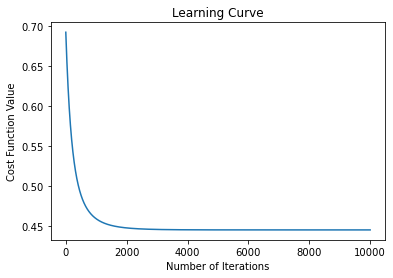

In [140]:
# Fitting the training dataset to the logistic regression model
w, b = gradient_descent(X, Y, 10000)

In [141]:
output_train = []
for i in range(X.shape[0]):
    value_train = sigmoid(np.dot(X[i], w) + b)
    if value_train >= 0.5:
        output_train.append(1)
    else:
        output_train.append(0)

In [143]:
count_train = 0
for i in range(X.shape[0]):
    if output_train[i] != Y[i]:
        count_train += 1

In [144]:
count_train

187

In [163]:
# Accuracy of the training model
((X.shape[0] - count_train) / X.shape[0]) * 100

79.01234567901234

In [164]:
def map_feature(x1, x2, degree):
    x1 = np.atleast_1d(x1)
    x2 = np.atleast_1d(x2)
    
    out = []
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((x1 ** (i - j)) * (x2 ** j))
    return np.stack(out, axis=1)

In [165]:
X_train_1 = map_feature(X[:, 0], X[:, 1], 2)

In [166]:
X_train_1

array([[ 0.82737724,  0.73769513,  0.6845531 ,  0.61035216,  0.54419411],
       [-1.56610693, -1.35557354,  2.4526909 ,  2.12297311,  1.83757962],
       [ 0.82737724, -1.35557354,  0.6845531 , -1.1215707 ,  1.83757962],
       ...,
       [ 0.82737724, -1.35557354,  0.6845531 , -1.1215707 ,  1.83757962],
       [-1.56610693,  0.73769513,  2.4526909 , -1.15530946,  0.54419411],
       [ 0.82737724,  0.73769513,  0.6845531 ,  0.61035216,  0.54419411]])

In [167]:
X_train_1 == X

array([[ True,  True, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True, False, False, False],
       ...,
       [ True,  True, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True, False, False, False]])

In [169]:
X_1 = np.column_stack((X_train_1[:, 0], X_train_1[:, 1], X_train_1[:, 2], X_train_1[:, 3], X_train_1[:, 4], X[:,2], X[:, 3], X[:, 4]))

In [170]:
X_1.shape

(891, 8)

In [171]:
X_1.max()

6.974147318082627

Iteration: 0; Cost: 0.6919465437577982
Iteration: 50; Cost: 0.6400307883660084
Iteration: 100; Cost: 0.6009522892929343
Iteration: 150; Cost: 0.5711448880486998
Iteration: 200; Cost: 0.5480874286367977
Iteration: 250; Cost: 0.5299988972640433
Iteration: 300; Cost: 0.5156135001522951
Iteration: 350; Cost: 0.5040234381141324
Iteration: 400; Cost: 0.49457071226212634
Iteration: 450; Cost: 0.48677290641119797
Iteration: 500; Cost: 0.4802721517379554
Iteration: 550; Cost: 0.4747998310300244
Iteration: 600; Cost: 0.47015197665956887
Iteration: 650; Cost: 0.46617196513882586
Iteration: 700; Cost: 0.4627382235134907
Iteration: 750; Cost: 0.4597554065115537
Iteration: 800; Cost: 0.45714799916468246
Iteration: 850; Cost: 0.4548556307103852
Iteration: 900; Cost: 0.4528296076968746
Iteration: 950; Cost: 0.45103032419065275
Iteration: 1000; Cost: 0.4494253090419386
Iteration: 1050; Cost: 0.44798774019697124
Iteration: 1100; Cost: 0.4466953045315467
Iteration: 1150; Cost: 0.44552931554882014
Iterati

Iteration: 9700; Cost: 0.43059762114887534
Iteration: 9750; Cost: 0.4305965320554238
Iteration: 9800; Cost: 0.43059546672172555
Iteration: 9850; Cost: 0.4305944245597223
Iteration: 9900; Cost: 0.4305934049983359
Iteration: 9950; Cost: 0.4305924074828954


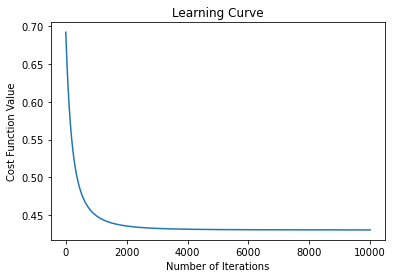

In [173]:
w_1, b_1 = gradient_descent(X_1, Y, 10000)

In [174]:
w_1, b_1

(array([-1.04789518, -1.38844361,  0.17408572,  0.59315637,  0.10467473,
        -0.54984124, -0.35711168, -0.01211883]),
 -0.7532156985489127)

In [181]:
test = pd.read_csv('test.csv')

In [182]:
test['Sex'].replace({
    'male' : 1,
    'female' : 0
}, inplace=True)

In [186]:
test['Age'].replace({
    np.nan : (np.sum(test['Age']) / test.shape[0])
}, inplace=True)

In [187]:
np.sum(test['Age']) / test.shape[0]

28.991163205970565

In [188]:
test['Age'].unique()

array([34.5       , 47.        , 62.        , 27.        , 22.        ,
       14.        , 30.        , 26.        , 18.        , 21.        ,
       24.04425837, 46.        , 23.        , 63.        , 24.        ,
       35.        , 45.        , 55.        ,  9.        , 48.        ,
       50.        , 22.5       , 41.        , 33.        , 18.5       ,
       25.        , 39.        , 60.        , 36.        , 20.        ,
       28.        , 10.        , 17.        , 32.        , 13.        ,
       31.        , 29.        , 28.5       , 32.5       ,  6.        ,
       67.        , 49.        ,  2.        , 76.        , 43.        ,
       16.        ,  1.        , 12.        , 42.        , 53.        ,
       26.5       , 40.        , 61.        , 60.5       ,  7.        ,
       15.        , 54.        , 64.        , 37.        , 34.        ,
       11.5       ,  8.        ,  0.33      , 38.        , 57.        ,
       40.5       ,  0.92      , 19.        , 36.5       ,  0.75

In [189]:
test.shape[0]

418

In [190]:
np.sum(test['Age'])

12118.306220095696

In [191]:
12118.306220095696 / 418

28.991163205970565

In [192]:
test['Age'].unique()

array([34.5       , 47.        , 62.        , 27.        , 22.        ,
       14.        , 30.        , 26.        , 18.        , 21.        ,
       24.04425837, 46.        , 23.        , 63.        , 24.        ,
       35.        , 45.        , 55.        ,  9.        , 48.        ,
       50.        , 22.5       , 41.        , 33.        , 18.5       ,
       25.        , 39.        , 60.        , 36.        , 20.        ,
       28.        , 10.        , 17.        , 32.        , 13.        ,
       31.        , 29.        , 28.5       , 32.5       ,  6.        ,
       67.        , 49.        ,  2.        , 76.        , 43.        ,
       16.        ,  1.        , 12.        , 42.        , 53.        ,
       26.5       , 40.        , 61.        , 60.5       ,  7.        ,
       15.        , 54.        , 64.        , 37.        , 34.        ,
       11.5       ,  8.        ,  0.33      , 38.        , 57.        ,
       40.5       ,  0.92      , 19.        , 36.5       ,  0.75

In [193]:
test['Sex'].unique()

array([1, 0], dtype=int64)

In [194]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [195]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [196]:
X_test = np.array(test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']])

In [197]:
X_test.shape

(418, 5)

In [198]:
mu_test = np.mean(X_test, axis=0)
sigma_test = np.std(X_test, axis=0)
X_test = (X_test - mu_test) / sigma_test

In [199]:
X_test

array([[ 0.87348191,  0.75592895,  0.42809939, -0.49947002, -0.4002477 ],
       [ 0.87348191, -1.32287566,  1.39949183,  0.61699237, -0.4002477 ],
       [-0.31581919,  0.75592895,  2.56516276, -0.49947002, -0.4002477 ],
       ...,
       [ 0.87348191,  0.75592895,  0.73894497, -0.49947002, -0.4002477 ],
       [ 0.87348191,  0.75592895, -0.38443088, -0.49947002, -0.4002477 ],
       [ 0.87348191,  0.75592895, -0.38443088,  0.61699237,  0.61989583]])

In [200]:
X_test_map = map_feature(X_test[:, 0], X_test[:, 1], 2)

In [201]:
X_test_map.shape

(418, 5)

In [202]:
X_test_map == X_test

array([[ True,  True, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True, False, False, False],
       ...,
       [ True,  True, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True, False, False, False]])

In [203]:
X_final_test=np.column_stack((X_test_map[:,0],X_test_map[:,1],X_test_map[:,2],X_test_map[:,3],X_test_map[:,4],X_test[:,2],X_test[:,3],X_test[:,4]))

In [204]:
X_final_test.shape

(418, 8)

In [205]:
output_test = []
for i in range(X_final_test.shape[0]):
    value_test = sigmoid(np.dot(X_final_test[i], w_1) + b_1)
    if value_test >= 0.5:
        output_test.append(1)
    else:
        output_test.append(0)

In [207]:
output_test.count(1)

128

In [208]:
output_test.count(0)

290

In [209]:
290+128

418

In [210]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q


In [211]:
PassengerId = np.array(test['PassengerId'])

In [212]:
PassengerId.shape

(418,)

In [215]:
output_test.count(1)

128

In [216]:
output_test = np.array(output_test)

In [217]:
output_test.shape

(418,)

In [228]:
final_dataframe = pd.DataFrame([PassengerId, output_test])

In [229]:
final_dataframe = final_dataframe.T

In [230]:
final_dataframe.head()

,0,1
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [231]:
final_dataframe.rename(columns = {0:'PassengerId', 1:'Survived'}, inplace = True)

In [233]:
final_dataframe.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [234]:
final_dataframe.to_csv('gender_submission.csv', index=False)